<a href="https://colab.research.google.com/github/Hadeer-Youssef/-Case-Study-Assignment/blob/Hadeer-Youssef-patch-1/Solving_Task_ocr_blnk_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bussiness Problem Details :





### **Dataset Overview**
The dataset consists of **885 digital images** categorized into **10 classes (digits 0–9)**. Each class represents a unique numeric digit, and the distribution of images across these classes varies. The dataset is intended for Optical Character Recognition (OCR), focusing on classifying handwritten or printed digits.

---

### **Class Distribution**
The dataset is imbalanced, as the number of images in each class is not uniform. Here's the detailed breakdown:

| **Digit (Class)** | **Number of Images** | **Percentage of Total Images (%)** |
|-------------------|----------------------|-----------------------------------|
| **0**             | 105                 | 11.86%                            |
| **1**             | 91                  | 10.28%                            |
| **2**             | 77                  | 8.70%                             |
| **3**             | 78                  | 8.81%                             |
| **4**             | 112                 | 12.66%                            |
| **5**             | 115                 | 12.99%                            |
| **6**             | 80                  | 9.04%                             |
| **7**             | 52                  | 5.87%                             |
| **8**             | 75                  | 8.47%                             |
| **9**             | 100                 | 11.30%                            |
| **Total**         | 885                 | 100%                              |

#### **Key Observations:**
1. The largest class is **5**, with 115 images, accounting for approximately **13% of the dataset**.
2. The smallest class is **7**, with only 52 images, accounting for approximately **6% of the dataset**.
3. The dataset shows an imbalanced distribution, which may affect model performance if not addressed during training.

---

### **Data Characteristics**
1. **Image Size**:  
   - Typically, images in OCR tasks are grayscale or RGB and resized to a fixed dimension (e.g., 28x28 pixels) for uniformity. Ensure that all images in this dataset are preprocessed accordingly.
   
2. **Data Type**:  
   - The dataset likely contains **grayscale images** (single channel), but if they are in RGB, they can be converted to grayscale to reduce computational complexity.

3. **Format**:  
   - Images are usually stored in standard formats such as `.jpg`The dataset must be organized into directories, where each folder corresponds to a digit class (e.g., a folder named "0" contains all images of digit 0).

4. **Data Augmentation**: (optional)  
   - To handle the class imbalance, techniques like **data augmentation** (rotation, scaling, translation, noise addition, etc.) can be applied, especially to underrepresented classes (e.g., digit 7).

---

### **pipline Classification**
1. **Objective**:  
   - The primary objective is to train a model to accurately classify each image into one of the 10 digit classes (0–9).

2. **Preprocessing**:  
   - Normalize pixel values (e.g., scaling values between 0 and 1).
   - Resize images to a fixed shape (e.g., 28x28).
   - expand dim. to suitable for CCN structure
   - convert label to one hot encoding

3. **Dataset Splitting**:  
   - **Training Set**: 80% of the dataset, ensuring all classes are represented proportionally.
   - **Validation Set**: Around 10% of the dataset, used to tune hyperparameters and avoid overfitting.
   - **Test Set**: The remaining 10%, used for final evaluation.

---

### **Challenges**
1. **Class Imbalance**:  
   - Imbalanced datasets can lead to models biased towards classes with more images. Using class weights or oversampling is crucial.

2. **Ambiguity in Images**:  
   - Some digits, such as 3 and 8 or 6 and 9, might visually overlap, leading to misclassification. Model architecture must be robust to such ambiguities.

3. **Noise in Data**:  
   - OCR datasets often contain noise like poor lighting, blurring, or inconsistent handwriting. Preprocessing and augmenting data to mimic such conditions can improve robustness.

---

### **Model**
For digit OCR tasks, **Convolutional Neural Networks (CNNs)** are widely used due to their ability to capture spatial patterns in images. Some popular architectures include:
1. Three Convolutional Layers with
   activation='relu' and
   Maxpooling &Dropout layers
2. Flatten and fully connected layers
   with activation='relu'
3. Output layer with activation='softmax'
   10 classes for digits 0-9  
4. Optimizer='adam',
   loss='categorical_crossentropy', metrics= 'accuracy'   
5. Using 50 epochs,batch_size=32,with
   early stopping to prevent overfitting
   and increase performance
6. Restoring model weights from the end
   of the best epoch: 34.
   Total execution time is: 0:01:00.584245   
---

### **Deployment**
  using Django with tensorflow
---
### **Results**

This dataset, despite its small size and imbalance, but I achieved (perfect result)--->
# **(Accuracy_Testing: 97.7%n)**
# **(Accuracy_Training: 99.6%n)**
 serves as a great starting point for developing OCR models and testing their effectiveness in real-world applications.

In [47]:
import glob
import os
import cv2
import numpy as np
import pandas as pd
import random
import zipfile
# Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output as cls
# model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras import regularizers
#evaluation
from sklearn import metrics
# Need to print the classiiofcation report , confusion matrix using heatmap
from sklearn.metrics import auc,confusion_matrix, roc_curve, classification_report, accuracy_score


In [2]:
pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/ocr_task_blnk

/content/drive/MyDrive/ocr_task_blnk


In [ ]:
# to unzip my dataset
zip_path = 'OCR_Task_Digits_Dataset.zip'
extract_path = 'extracted_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
class_names=sorted(os.listdir(r"extracted_data/dataset"))
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
len(os.listdir(r"extracted_data/dataset"))

10

In [6]:
# get the directory of data
Root_Dir="extracted_data/dataset/"
number_of_images={}
#list dir give me what is present in that particular folder
for dir in os.listdir(Root_Dir):
    number_of_images[dir]=len(os.listdir(os.path.join(Root_Dir,dir)))#length


In [7]:
number_of_images

{'0': 105,
 '1': 91,
 '2': 77,
 '3': 78,
 '4': 112,
 '5': 115,
 '6': 80,
 '7': 52,
 '8': 75,
 '9': 100}

In [8]:
# class distribution
class_diss = [len(os.listdir(Root_Dir+ name)) for name in class_names]
class_diss

[105, 91, 77, 78, 112, 115, 80, 52, 75, 100]

In [9]:
sum(class_diss)

885

#Visualizing class distribution

In [10]:
fig = px.pie(names=class_names, values=class_diss, title="Class Distribution", hole=0.2)
fig.update_layout({'title':{'x':0.5}})
fig.show()

In [11]:
#draw histogram for labels
px.histogram(x=class_names,y=class_diss,color=class_names,title="Class Distribution")

In [12]:
def display_random_images(base_dir):
    categories = glob.glob(os.path.join(base_dir, '*'))  # Get all category folders

    # Calculate the number of rows needed (one for each category)
    num_rows = len(categories)

    # Create a figure with enough rows and 4 columns
    fig, axs = plt.subplots(num_rows, 4, figsize=(10, 3 * num_rows))  # Adjust figsize as needed

    # Iterate through categories and display images
    for row_index, category in enumerate(categories):
        image_paths = glob.glob(os.path.join(category, '*'))
        if not image_paths:
            continue

        # Select 4 random images from the category
        random_image_paths = random.sample(image_paths, min(4, len(image_paths)))

        # Display images in the current row
        for col_index, image_path in enumerate(random_image_paths):
            img = cv2.imread(image_path)
            if img is None:
                continue

            axs[row_index, col_index].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[row_index, col_index].set_title(os.path.basename(category))
            axs[row_index, col_index].axis('off')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

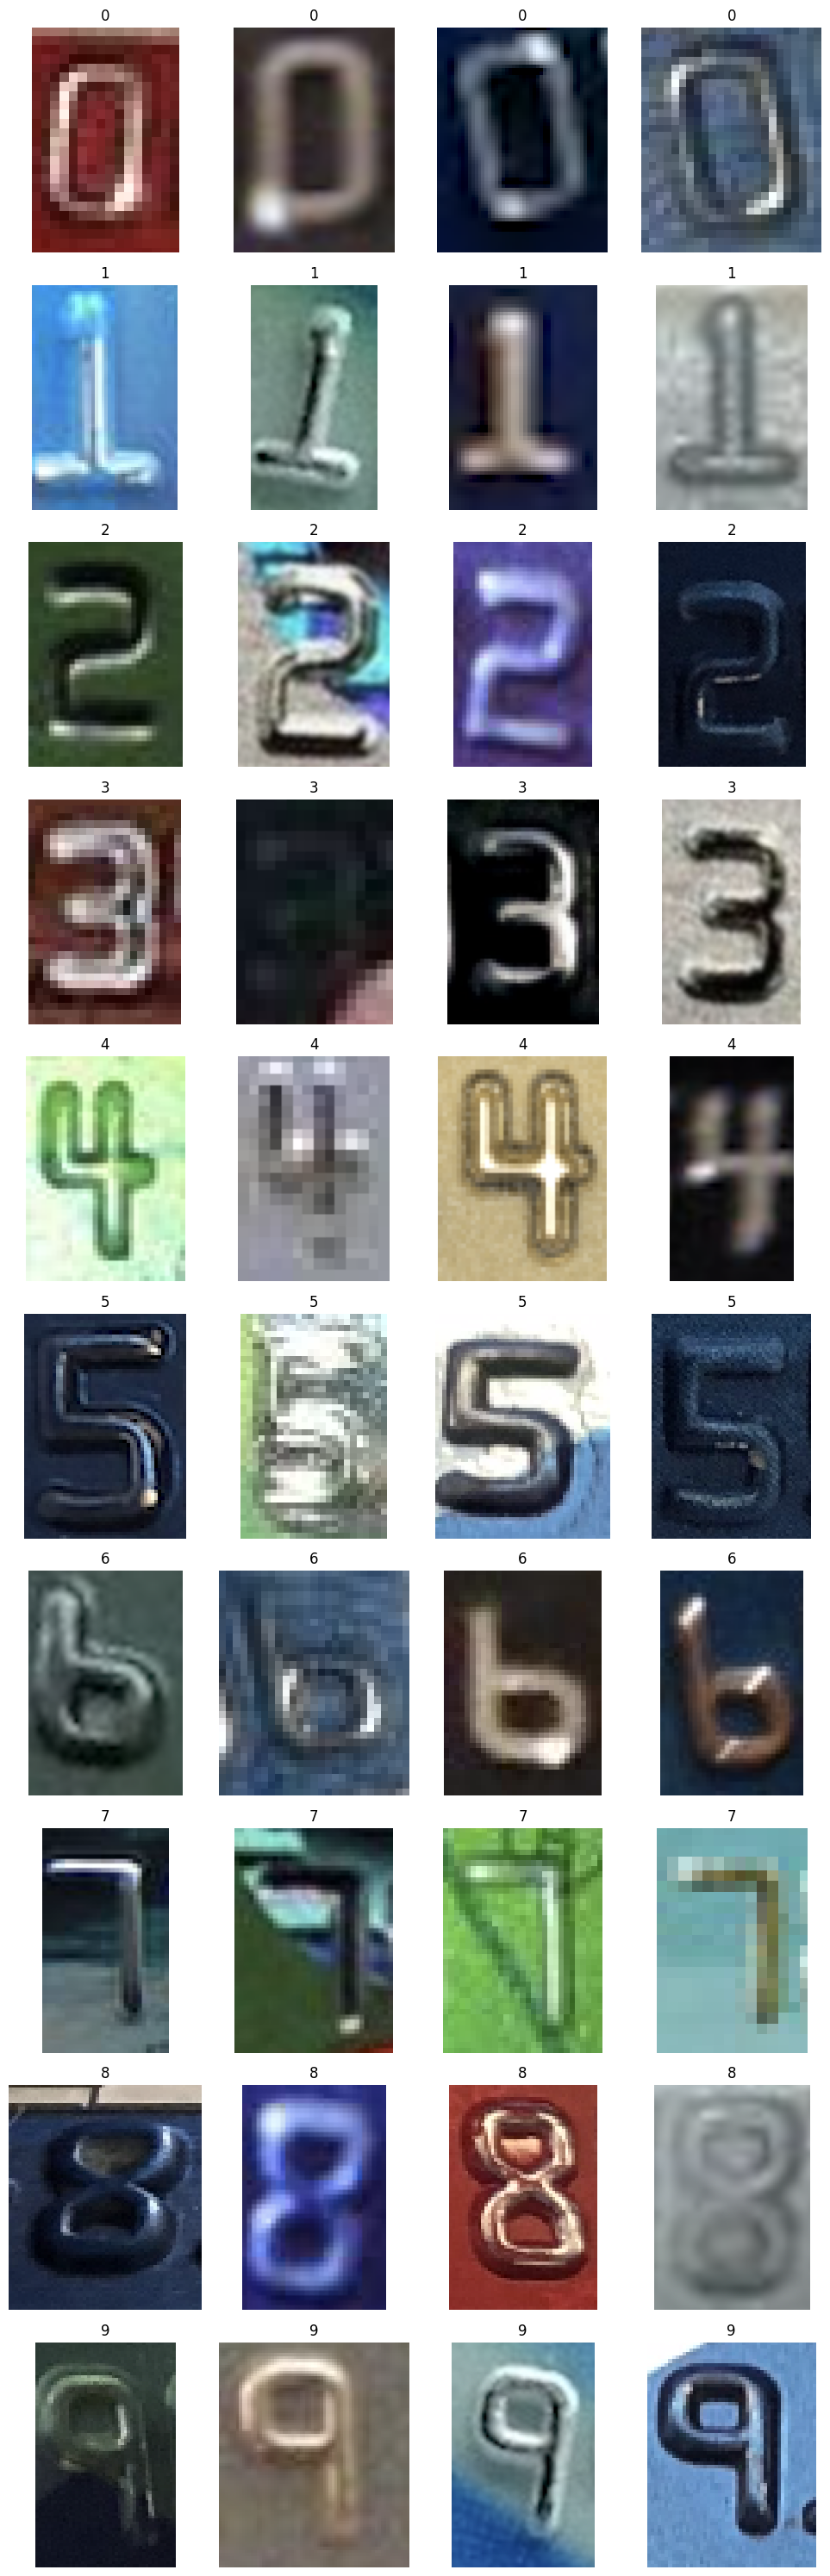

In [13]:
display_random_images(Root_Dir)

#Load Dataset AS (X,Y) & preprocessing (convert to gray scale and resize to 28*28)

In [14]:

def load_data(root_dir):
    x = []
    y = []
    class_names = sorted(os.listdir(root_dir))
    for class_index, class_name in enumerate(class_names):
        class_dir = os.path.join(root_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            if img is not None:
                img = cv2.resize(img, (28, 28)) # Resize image
                x.append(img)
                y.append(class_index)
    return np.array(x), np.array(y)



In [15]:
# Now x and y contain the image data and corresponding labels.
x, y = load_data("extracted_data/dataset/")

In [16]:
x.shape ,y.shape

((885, 28, 28), (885,))

#Split Dataset ---> (80%-20%)

In [18]:
# Setting the seed value (It's good for the randomization)
seed = 42
np.random.seed(seed)

# Split the data into training and test sets (80% for training, 20% for testing_val)
x_train, x_test_val, y_train, y_test_val = train_test_split(x,y, test_size=0.2, random_state=seed, shuffle=True,stratify=y)

# Split the training data into training and validation sets (50% for testing, 50% for validation)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.5, random_state=seed,stratify=y_test_val)


In [19]:
# Check the distribution of classes
print("Train class distribution:", pd.Series(y_train).value_counts(normalize=True))
print("Test class distribution:", pd.Series(y_test).value_counts(normalize=True))
print("val class distribution:", pd.Series(y_val).value_counts(normalize=True))

Train class distribution: 5    0.129944
4    0.125706
0    0.118644
9    0.112994
1    0.103107
6    0.090395
3    0.087571
2    0.087571
8    0.084746
7    0.059322
Name: proportion, dtype: float64
Test class distribution: 4    0.125000
5    0.125000
0    0.113636
9    0.113636
1    0.102273
8    0.090909
2    0.090909
3    0.090909
6    0.090909
7    0.056818
Name: proportion, dtype: float64
val class distribution: 5    0.134831
4    0.134831
0    0.123596
9    0.112360
1    0.101124
6    0.089888
3    0.089888
2    0.078652
8    0.078652
7    0.056180
Name: proportion, dtype: float64


In [20]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_val",x_val.shape)
print("y_val",y_val.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (708, 28, 28)
y_train (708,)
x_val (89, 28, 28)
y_val (89,)
x_test (88, 28, 28)
y_test (88,)


In [21]:
num_labels = len(np.unique(y_train))
print("total de labels:{}".format(num_labels))
print("labels:{}".format(np.unique(y_train)))

total de labels:10
labels:[0 1 2 3 4 5 6 7 8 9]


#Preprocessing for Modeling step

In [22]:
image_size = x_train.shape[1]
input_size = image_size * image_size

print("x_train:{}".format(x_train.shape))
print("x_test:{}".format(x_test.shape))
print("x_val:{}".format(x_val.shape))

x_train = np.reshape(x_train, [-1,image_size,image_size,1])
x_train = x_train.astype('float32') / 255

x_test = np.reshape(x_test, [-1, image_size,image_size,1])
x_test = x_test.astype('float32') / 255

x_val = np.reshape(x_val, [-1, image_size,image_size,1])
x_val = x_val.astype('float32') / 255

print("x_train:{}".format(x_train.shape))
print("x_test:{}".format(x_test.shape))
print("x_val:{}".format(x_val.shape))

x_train:(708, 28, 28)
x_test:(88, 28, 28)
x_val:(89, 28, 28)
x_train:(708, 28, 28, 1)
x_test:(88, 28, 28, 1)
x_val:(89, 28, 28, 1)


In [23]:
#One hot encode y values for neural network.
y_train= to_categorical(y_train)
y_val= to_categorical(y_val)
y_test= to_categorical(y_test)

In [24]:
print("y_train:{}".format(y_train.shape))
print("y_test:{}".format(y_test.shape))
print("y_val:{}".format(y_val.shape))

y_train:(708, 10)
y_test:(88, 10)
y_val:(89, 10)


#Model structure step

In [25]:
es = EarlyStopping(
    monitor='val_accuracy', min_delta=0.0001, patience=20, verbose=2,
    mode='max', baseline=None, restore_best_weights=True
)
lr = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=10, verbose=2,
    mode='max', min_delta=1e-5, cooldown=0, min_lr=0
)

callbacks = [es, lr]

In [27]:
# Define the CNN model
model=Sequential()
  # Convolutional Layer 1
model.add(Conv2D(32,(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 # Convolutional Layer 2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
  # Convolutional Layer 3
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
  # Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(activation='relu', units=64))
model.add(Dense(activation='relu', units=128))
model.add(Dense(activation='relu', units=64))
model.add(Dense(activation='softmax', units=10))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,154 (461.54 KB)

 Trainable params: 118,154 (461.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training step

In [ ]:
import datetime
start = datetime.datetime.now()

hist=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_val,y_val), verbose=1,callbacks = [callbacks])

end = datetime.datetime.now()
print("Total execution time is: ", end-start)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.0989 - loss: 2.3005 - val_accuracy: 0.1348 - val_loss: 2.2819 - learning_rate: 0.0010
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1242 - loss: 2.2843 - val_accuracy: 0.1124 - val_loss: 2.2652 - learning_rate: 0.0010
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1355 - loss: 2.2725 - val_accuracy: 0.1348 - val_loss: 2.2415 - learning_rate: 0.0010
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1392 - loss: 2.2336 - val_accuracy: 0.1685 - val_loss: 2.1522 - learning_rate: 0.0010
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1883 - loss: 2.1353 - val_accuracy: 0.2697 - val_loss: 1.9643 - learning_rate: 0.0010
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2847 - loss: 1.9143 - val_accuracy: 0.4944 - val_loss: 1.5946 - learning_rate: 0.0010
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3653 - loss: 1.6712 - val_acc

#Evaluation step

In [29]:
def plot_performance(history):
    plt.figure(figsize=(15,7))

    plt.subplot(2, 1, 1)
    # Extract the loss and accuracy values for the last 20 epochs
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.legend()
    plt.grid()
    plt.title('train and val loss evolution')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.legend()
    plt.grid()
    plt.title('train and val accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    #plt.xticks(range(0,38,1))
    #plt.yticks([i/10 for i in range(2,11)])

    plt.show()

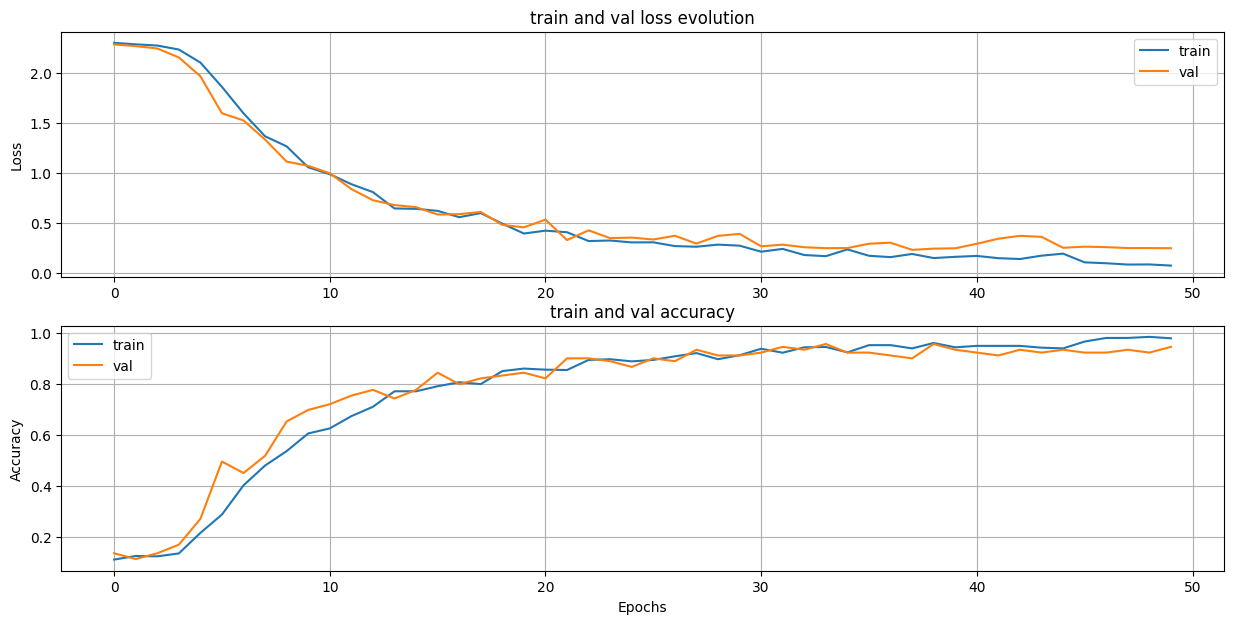

In [ ]:
plot_performance(hist)

In [ ]:
#save model
#model.save("model.h5")

In [35]:
#load model
loaded_model=load_model('model.h5')

In [36]:
_, acc = loaded_model.evaluate(x_test,
                        y_test,
                        verbose=0)
print("Accuracy_Testing: %.1f%%n" % (100.0 * acc))

Accuracy_Testing: 97.7%n


In [37]:
_, acc = loaded_model.evaluate(x_train,
                        y_train,
                        verbose=0)
print("Accuracy_Training: %.1f%%n" % (100.0 * acc))

Accuracy_Training: 99.6%n


In [38]:
predict_test1 = loaded_model.predict(x_test)
#print(predict_test1)
predict_test1 = np.argmax(predict_test1, axis=1)
#print(predict_test1)
# Convert y_test back to class labels using argmax
y_test_labels = np.argmax(y_test, axis=1)
print("Accuracy = ", metrics.accuracy_score(y_test_labels, predict_test1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Accuracy =  0.9772727272727273


              precision    recall  f1-score   support

           0     0.9091    1.0000    0.9524        10
           1     1.0000    1.0000    1.0000         9
           2     1.0000    1.0000    1.0000         8
           3     1.0000    1.0000    1.0000         8
           4     1.0000    0.9091    0.9524        11
           5     1.0000    1.0000    1.0000        11
           6     1.0000    1.0000    1.0000         8
           7     1.0000    1.0000    1.0000         5
           8     0.8750    0.8750    0.8750         8
           9     1.0000    1.0000    1.0000        10

    accuracy                         0.9773        88
   macro avg     0.9784    0.9784    0.9780        88
weighted avg     0.9783    0.9773    0.9773        88



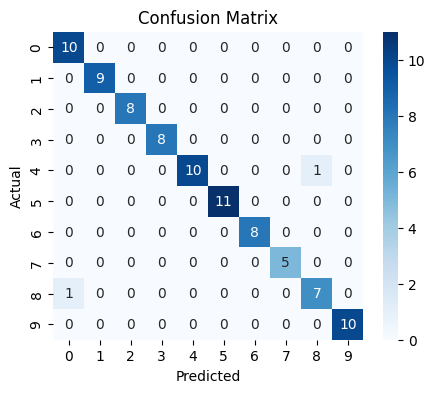

In [40]:
print(classification_report(y_test_labels, predict_test1,digits=4))
cm = confusion_matrix(y_test_labels, predict_test1)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 


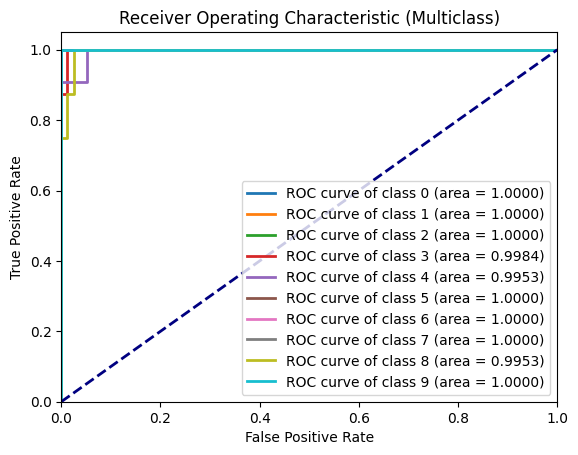

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [42]:
# ROC Curve and AUC for multiclass
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1] # Number of classes

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], loaded_model.predict(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multiclass)')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), loaded_model.predict(x_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


In [46]:
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [49]:
def show_images(images, labels, GRID=[5, 5], model=None, size=(20, 20)):
    n_rows = GRID[0]
    n_cols = GRID[1]
    n_images = n_rows * n_cols
    mylist=[]
    plt.figure(figsize=size)
    for i in range(1, 20):
        id = np.random.randint(0, images.shape[0])
        print(id)
        mylist.append(id)
        image = images[id]
        # Get the original class index before one-hot encoding
        label_index = np.argmax(labels[id])
        label = class_names[label_index]  # Use the index to get the class name
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image,cmap='gray')

        if model is None:
            title = f"Class : {label}"
        else:
            pred = class_names[int(np.argmax(model.predict(image[np.newaxis, ...])))]
            title = f"Org : {label}, Pred : {pred}"
            cls()

        plt.title(title)
        plt.axis('off')

        i += 1
        if i >= (n_images + 1):
            break
    print(mylist)
    plt.tight_layout()
    plt.show()

[63, 59, 20, 32, 75, 57, 21, 48, 58, 41, 59, 79, 14, 61, 61, 46, 61, 50, 54]


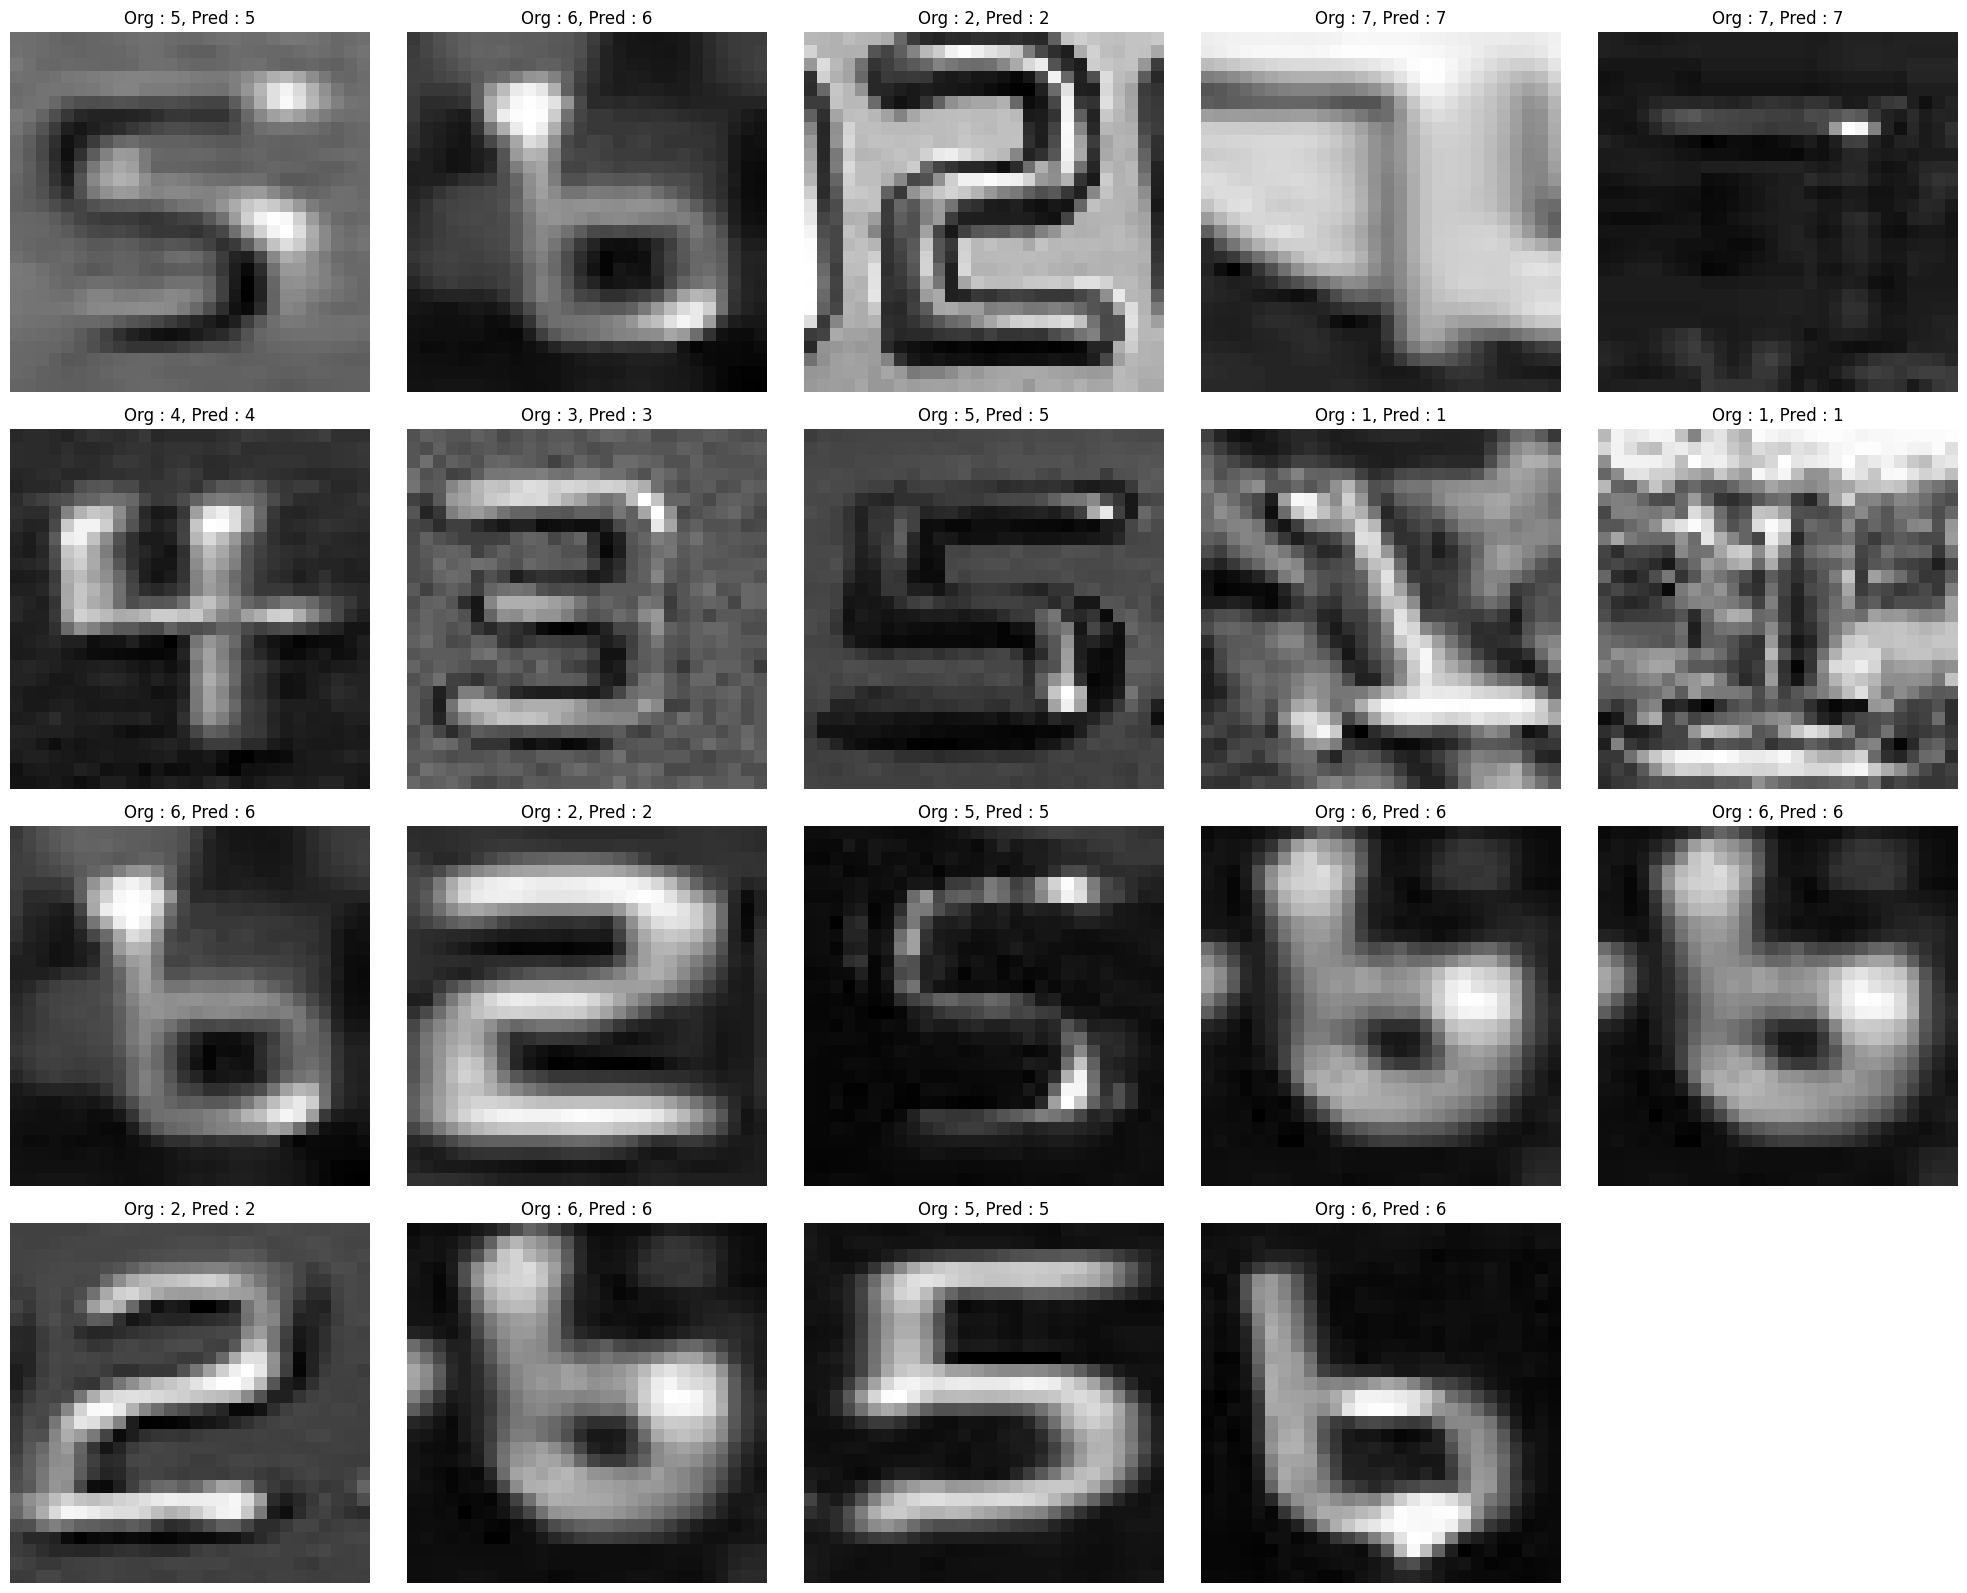

In [50]:
# plotting predictions
show_images(x_test,y_test,model=loaded_model)

In [52]:
file_url =r"/content/drive/MyDrive/ocr_task_blnk/extracted_data/dataset/6/6_10.png"
img_size=28
		# load img to arr as grayscale and resize
img_arr = cv2.imread(file_url,0) # 0  convert RGB to grayscale
img_arr = cv2.resize(img_arr,(img_size,img_size))
img_arr = img_arr/255.0  #scale img
img = np.expand_dims(img_arr,0) # shape img to (1,img_size,img_size)

		#  load model
model_path ='model.h5'
model_loading = load_model(model_path)

		# make prediction
prediction = model_loading.predict(img)

predicted_label = class_names[np.argmax(prediction)]
predicted_probability = round(prediction.max()*100,2)

print("predicted_label=",predicted_label)
print("predicted_probability=",predicted_probability)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
predicted_label= 6
predicted_probability= 100.0


In [ ]:
#save model
#model.save("model_30_split.keras")

In [ ]:
#model1=load_model('model_30_split.keras')

In [ ]:
#save model using pickle
#import pickle
#filename = 'finalized_model.sav'
#pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Save the model to a file
#with open('model.pkl', 'wb') as file:
 #   pickle.dump(model, file)

#print("Model saved successfully.")


Model saved successfully.


In [ ]:
# Load the model from the file
#with open('model.pkl', 'rb') as file:
 #   loaded_model = pickle.load(file)

#print("Model loaded successfully.")


Model loaded successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
